In [1]:
!pip install lightgbm==3.3.2
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
import lightgbm
lightgbm.__version__

'3.3.2'

In [3]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [5]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9877


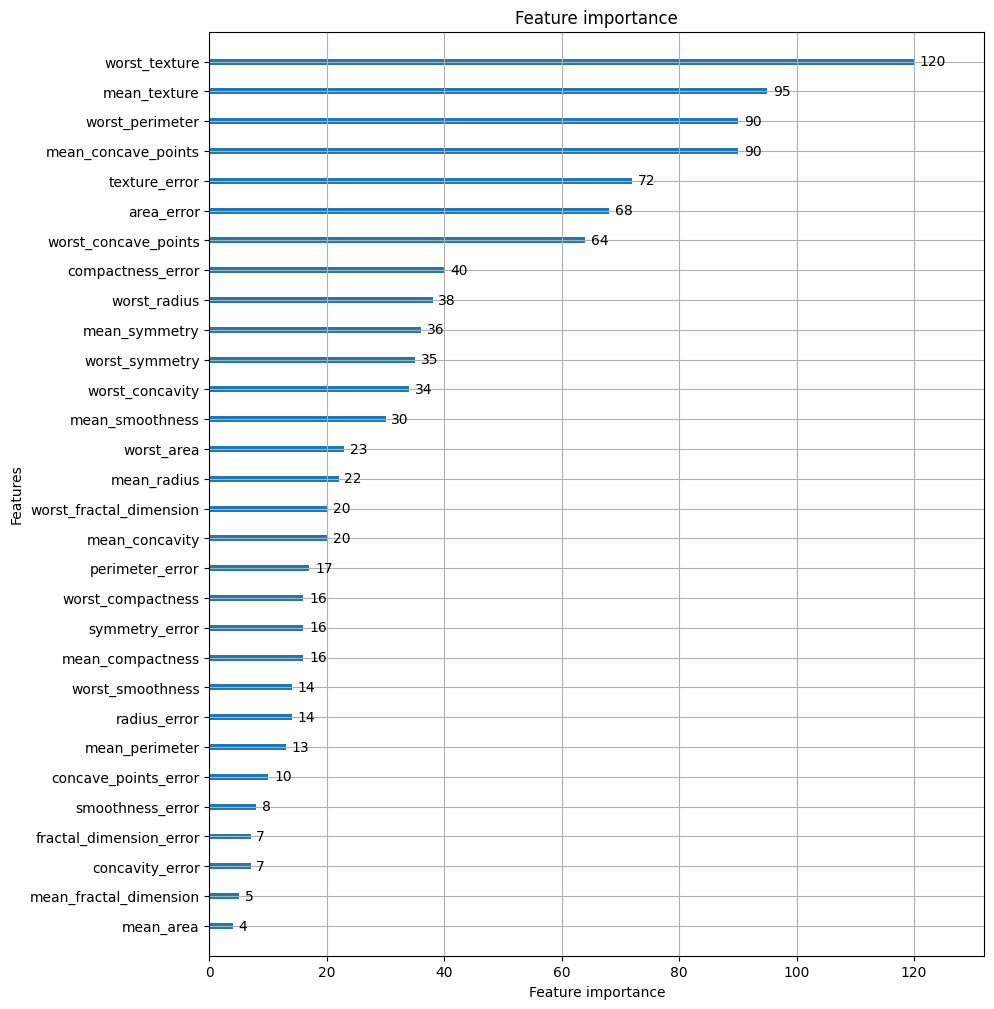

In [6]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)
plt.savefig('lightgbm_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

# 코드 1

In [12]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('data/Final/20230911_인코딩완료.csv')
X = data[['점포수', '시간대1',
       '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', '총 상주인구 수',
       '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', 'area', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '배후지_아파트_단지_수', '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수',
       '배후지_아파트_가격_2_억_세대_수', '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수',
       '배후지_아파트_가격_5_억_세대_수', '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수',
       '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수']]

y = data['매출']

# 훈련 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-fold 교차 검증 설정
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301))         # 200부터 300까지
}

# K-fold 교차 검증
for train_idx, val_idx in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_kf, y_val_kf = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # 데이터셋 생성
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)

    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    random_search.fit(X_train_kf, y_train_kf)
    best_params = random_search.best_params_

    # 최적 파라미터로 모델 초기화
    bst = lgb.LGBMRegressor(**best_params)

    # 모델 훈련 with early stopping
    bst.fit(
        X_train_kf,
        y_train_kf,
        eval_set=[(X_val_kf, y_val_kf)],  # Specify the evaluation dataset
        eval_metric='rmse',  # Specify the evaluation metric (e.g., RMSE)
    )

    # 검증 데이터에 대한 예측
    y_pred_val = bst.predict(X_val_kf)

    # 평가 지표 계산 (RMSE, MAE)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred_val))
    mae = mean_absolute_error(y_val_kf, y_pred_val)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)

# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("Best Hyperparameters for K-fold CV:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

# 최종 모델 학습 (전체 훈련 데이터)
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_test = final_model.predict(X_test)

# 테스트 데이터 평가 (RMSE, MAE)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f'테스트 데이터 RMSE: {test_rmse}')
print(f'테스트 데이터 MAE: {test_mae}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[1]	valid_0's rmse: 157642	valid_0's l2: 2.4851e+10
[2]	valid_0's rmse: 153784	valid_0's l2: 2.36496e+10
[3]	valid_0's rmse: 150276	valid_0's l2: 2.25828e+10
[4]	valid_0's rmse: 146871	valid_0's l2: 2.15712e+10
[5]	valid_0's rmse: 143509	valid_0's l2: 2.05949e+10
[6]	valid_0's rmse: 140554	valid_0's l2: 1.97556e+10
[7]	valid_0's rmse: 137573	valid_0's l2: 1.89263e+10
[8]	valid_0's rmse: 134698	valid_0's l2: 1.81435e+10
[9]	valid_0's rmse: 131915	valid_0's l2: 1.74015e+10
[10]	valid_0's rmse: 129192	valid_0's l2: 1.66907e+10
[11]	valid_0's rmse: 126619	valid_0's l2: 1.60323e+10
[12]	valid_0's rmse: 124411	valid_0's l2: 1.5478e+10
[13]	valid_0's rmse: 122052	valid_0's l2: 1.48966e+10
[14]	valid_0's rmse: 120077	valid_0's l2: 1.44184e+10
[15]	valid_0's rmse: 117994	valid_0's l2: 1.39226e+10
[16]	valid_0's rmse: 115969	valid_0's l2: 1.34487e+10
[17]	valid_0's rmse: 114201	valid_0's l2: 1.30419e+10
[18]	valid_0's rmse: 112475	vali

In [13]:
# 코드2(최종)

In [15]:
# 데이터 로드
data = pd.read_csv('data/Final/20230911_인코딩완료.csv')

X = data[['점포수', '시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 
          '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', 'area', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '배후지_아파트_단지_수', '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수',
       '배후지_아파트_가격_2_억_세대_수', '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수',
       '배후지_아파트_가격_5_억_세대_수', '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수',
       '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수']]
y = data['매출']


# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("Best Hyperparameters for K-fold CV:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152601	training's l2: 2.32871e+10	valid_1's rmse: 160272	valid_1's l2: 2.56871e+10
[2]	training's rmse: 147080	training's l2: 2.16326e+10	valid_1's rmse: 155005	valid_1's l2: 2.40264e+10
[3]	training's rmse: 141941	training's l2: 2.01472e+10	valid_1's rmse: 150030	valid_1's l2: 2.25091e+10
[4]	training's rmse: 137116	training's l2: 1.88007e+10	valid_1's rmse: 145387	valid_1's l2: 2.11375e+10
[5]	training's rmse: 132535	training's l2: 1.75654e+10	valid_1's rmse: 141031	valid_1's l2: 1.98896e+10
[6]	training's rmse: 128110	training's l2: 1.64123e+10	valid_1's rmse: 136832	valid_1's l2: 1.8723e+10
[7]	training's rmse: 123952	training's l2: 1.53641e+10	valid_1's rmse: 132879	valid_1's l2: 1.76568e+10
[8]	training's rmse: 120062	training's l2: 1.44148e+10	valid_1's rmse: 129196	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152181	training's l2: 2.3159e+10	valid_1's rmse: 161933	valid_1's l2: 2.62223e+10
[2]	training's rmse: 146904	training's l2: 2.15807e+10	valid_1's rmse: 156607	valid_1's l2: 2.45256e+10
[3]	training's rmse: 141711	training's l2: 2.0082e+10	valid_1's rmse: 151445	valid_1's l2: 2.29355e+10
[4]	training's rmse: 136821	training's l2: 1.87199e+10	valid_1's rmse: 146531	valid_1's l2: 2.14713e+10
[5]	training's rmse: 132252	training's l2: 1.74907e+10	valid_1's rmse: 141800	valid_1's l2: 2.01073e+10
[6]	training's rmse: 127999	training's l2: 1.63838e+10	valid_1's rmse: 137595	valid_1's l2: 1.89323e+10
[7]	training's rmse: 123930	training's l2: 1.53586e+10	valid_1's rmse: 133551	valid_1's l2: 1.78357e+10
[8]	training's rmse: 120116	training's l2: 1.44278e+10	valid_1's rmse: 129804	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 154436	training's l2: 2.38506e+10	valid_1's rmse: 152472	valid_1's l2: 2.32479e+10
[2]	training's rmse: 148785	training's l2: 2.21371e+10	valid_1's rmse: 147310	valid_1's l2: 2.17003e+10
[3]	training's rmse: 143469	training's l2: 2.05834e+10	valid_1's rmse: 142427	valid_1's l2: 2.02854e+10
[4]	training's rmse: 138360	training's l2: 1.91436e+10	valid_1's rmse: 137800	valid_1's l2: 1.89888e+10
[5]	training's rmse: 133671	training's l2: 1.7868e+10	valid_1's rmse: 133411	valid_1's l2: 1.77985e+10
[6]	training's rmse: 129247	training's l2: 1.67049e+10	valid_1's rmse: 129476	valid_1's l2: 1.6764e+10
[7]	training's rmse: 125109	training's l2: 1.56524e+10	valid_1's rmse: 125827	valid_1's l2: 1.58324e+10
[8]	training's rmse: 121050	training's l2: 1.46531e+10	valid_1's rmse: 122215	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 155201	training's l2: 2.40874e+10	valid_1's rmse: 149925	valid_1's l2: 2.24775e+10
[2]	training's rmse: 149724	training's l2: 2.24174e+10	valid_1's rmse: 144319	valid_1's l2: 2.08281e+10
[3]	training's rmse: 144654	training's l2: 2.09249e+10	valid_1's rmse: 139133	valid_1's l2: 1.93579e+10
[4]	training's rmse: 139832	training's l2: 1.95531e+10	valid_1's rmse: 134272	valid_1's l2: 1.80289e+10
[5]	training's rmse: 135303	training's l2: 1.83069e+10	valid_1's rmse: 129621	valid_1's l2: 1.68016e+10
[6]	training's rmse: 130829	training's l2: 1.71163e+10	valid_1's rmse: 125167	valid_1's l2: 1.56667e+10
[7]	training's rmse: 126595	training's l2: 1.60262e+10	valid_1's rmse: 120945	valid_1's l2: 1.46276e+10
[8]	training's rmse: 122498	training's l2: 1.50057e+10	valid_1's rmse: 116719

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 156067	training's l2: 2.43571e+10	valid_1's rmse: 146644	valid_1's l2: 2.15045e+10
[2]	training's rmse: 150462	training's l2: 2.26388e+10	valid_1's rmse: 141825	valid_1's l2: 2.01144e+10
[3]	training's rmse: 145238	training's l2: 2.10939e+10	valid_1's rmse: 137369	valid_1's l2: 1.88702e+10
[4]	training's rmse: 140311	training's l2: 1.96872e+10	valid_1's rmse: 133078	valid_1's l2: 1.77097e+10
[5]	training's rmse: 135591	training's l2: 1.8385e+10	valid_1's rmse: 129085	valid_1's l2: 1.6663e+10
[6]	training's rmse: 131328	training's l2: 1.72471e+10	valid_1's rmse: 125505	valid_1's l2: 1.57514e+10
[7]	training's rmse: 127201	training's l2: 1.61801e+10	valid_1's rmse: 121913	valid_1's l2: 1.48628e+10
[8]	training's rmse: 123147	training's l2: 1.51652e+10	valid_1's rmse: 118387	v

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 41691.62728342055
평균 MAE: 22754.647141896414
Best Hyperparameters for K-fold CV:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
